In [4]:
from lxml import etree

In [9]:
tree=etree.parse("sample.xml")
root=tree.getroot()

In [11]:
tree
root

<Element girlgroup at 0x1e490bb3408>

In [30]:
kids=root.getchildren()
kids
members=[]
albums=[]
for child in kids:
    print(child.tag)
    print(child.text)
    if child.tag=='name':
        gname=child.text
    elif child.tag=='members':
        for xmember in child:
            members.append(xmember.text)
    elif child.tag=='albums':
        for xalbum in child:
            albums.append([xalbum.get("order"),xalbum.text])
            
print(members)
print(albums)

name
여자친구
members

    
albums

    
['소원', '예린', '은하', '유주', '신비', '엄지']
[['EP 1집', 'Season of Glass'], ['EP 2집', 'Flower Bud'], ['EP 3집', 'Snowflake'], ['정규 1집', 'LOL']]


In [35]:
print("결그룹 : %s" %gname)
print("멤버:",end="")
for i, m in enumerate(members):
    print(m, end=" ")
print()
for album in albums:
    print(" %s : %s" %(album[0], album[1]))

결그룹 : 여자친구
멤버:소원 예린 은하 유주 신비 엄지 
 EP 1집 : Season of Glass
 EP 2집 : Flower Bud
 EP 3집 : Snowflake
 정규 1집 : LOL


In [36]:
import json

In [60]:
path="usagov_bitly_data.txt"

records=[json.loads(line) for line in open(path, encoding="utf-8")] # line : key, value를 쌍으로 읽어서 인식함
records
records[0]['tz']

time_zones=[rec['tz'] for rec in records if 'tz' in rec]
# tz 컬럼이 있는 경우에만 time_zones에 저장
time_zones
    

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Europe/Madrid',
 'Asia/Kuala_Lumpur',
 'Asia/Nicosia',
 'America/Sao_Paulo',
 '',
 '',
 'Europe/London',
 'America/New_York',
 'Pacific/Honolulu',
 'America/Chicago',
 '',
 '',
 'Pacific/Honolulu',
 '',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/Chicago',
 'Europe/Rome',
 'America/New_York',
 'America/New_York',
 'America/Los_Angeles',
 '',
 '',
 'America/New_York',
 'America/New_York',
 'Europe/Malta',
 'America/New_York',
 'America/New_York',
 '',
 'America/Los_Angeles',
 'America/Sao_Paulo',
 '',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'Paci

In [71]:
def get_count(seq):
    counts={} # 딕셔너리
    for x in seq:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts
#counts['A/N']=1
            
counts=get_count(time_zones)
counts
counts['America/New_York']
len(time_zones)

3440

In [72]:
from collections import defaultdict

In [76]:
def get_counts2(seq):
    counts=defaultdict(int) #값을 0으로 초기화한 딕셔너리를 만들어라
    for x in seq:
        counts[x]+=1
    return counts

counts=get_counts2(time_zones)
print(counts)

defaultdict(<class 'int'>, {'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax'

In [103]:
time_zones
counts
# 가장 많이 등장하는 상위 10개의 표준시간대를 출력
# 출력하는 함수
counts.values()
def top10(seq, n=10):
    s=[]
    for i in seq.values():
        s.append(i)
    s.sort(reverse=True)
    return s[:n]
top10(counts)

[1251, 521, 400, 382, 191, 74, 37, 36, 35, 33]

In [95]:
counts.values()

dict_values([1251, 191, 33, 16, 521, 382, 10, 27, 2, 35, 3, 1, 74, 36, 400, 2, 8, 14, 5, 1, 3, 4, 12, 22, 10, 14, 5, 6, 28, 25, 5, 37, 6, 20, 3, 3, 3, 20, 9, 9, 1, 4, 6, 6, 4, 6, 3, 2, 3, 9, 1, 10, 1, 1, 15, 10, 4, 4, 10, 1, 6, 4, 2, 1, 4, 10, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 2, 2, 3, 1, 2, 3, 2, 1, 1, 11, 1, 1, 1, 1, 1, 1, 3, 1])

In [119]:
def top_counts(count_dict, n=10):
    pairs=[(count, tz) for tz, count in count_dict.items()]
    pairs.sort()
    return pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [120]:
from collections import Counter

In [126]:
counts=Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [141]:
mylist=['a','c','d','a','b']
myDict={'다':3,"나":1,'가':5}
Counter(mylist)
print(Counter(myDict))
c=Counter(a=3,b=2,c=5) # a가 3개 있다, b가 2개 있다, c가 5개 있다
print(c) 
print(sorted(c.elements()))

Counter({'가': 5, '다': 3, '나': 1})
Counter({'c': 5, 'a': 3, 'b': 2})
['a', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'c', 'c']


In [143]:
from pandas import DataFrame, Series
import pandas as pd

In [165]:
frame=DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [166]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
a              3440 non-null object
c              2919 non-null object
nk             3440 non-null float64
tz             3440 non-null object
gr             2919 non-null object
g              3440 non-null object
h              3440 non-null object
l              3440 non-null object
al             3094 non-null object
hh             3440 non-null object
r              3440 non-null object
u              3440 non-null object
t              3440 non-null float64
hc             3440 non-null float64
cy             2919 non-null object
ll             2919 non-null object
_heartbeat_    120 non-null float64
kw             93 non-null object
dtypes: float64(4), object(14)
memory usage: 500.8+ KB


In [159]:
frame['tz'].value_counts()

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
America/Montevideo         1
Asia/Yekaterinburg         1
Australia/Queensland       1
Asia/Pontianak             1
Name: tz, Length: 97, dtype: int64

In [167]:
ctz=frame['tz'].fillna("missing") # NaN => missing
ctz[ctz=='']='Unknown' # '' => Unknown

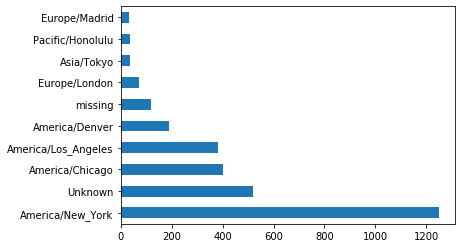

In [176]:
tzc=ctz.value_counts()
tzc[:10].plot(kind='barh')

In [193]:
frame['a']
# 운영체제 추출(정규식)
# frame.info()

res=Series([x.split()[0] for x in frame.a.dropna()])
# dropna : NaN 제거하고 추출 => 120개의 NaN을 제외하고 나옴
    #print(x)
# value_counts는 Series에서 가능
res.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [196]:
cframe=frame[frame.a.notnull()]

In [208]:
import numpy as np
myOs=np.where(cframe.a.str.contains('Windows'),'Windows','Not Windows')
myOs
# cframe의 a컬럼에 Windows 단어가 있으면(contains) Windows를, 없으면 Not Windows를 myOs에 저장

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], dtype='<U11')

In [212]:
# timezone, myOs에 따른 그훕화
tzos=cframe.groupby(['tz',myOs])
tzos.size().unstack().fillna(0)

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [252]:
def menu():
    n=int(input()) 
    input_num(n)
    
def input_num(n):
    cnt=0
    output=[]
    while cnt!=n:
        s=list(input())
        num=['?']*len(s)
        for i in range(len(s)):
            num[i]=int(s[i])           
        output.append(check(num))
        cnt+=1
    for i in range(len(output)):
        print("#",i," ",output[i])
              
def check(num):
    num_list=[]
    for i in num:
        if i not in num_list:
            num_list.append(i)
        else:
            num_list.pop(num_list.index(i))
            
    return len(num_list)
    
menu()


    

3
121
0123456798
555555
# 0   1
# 1   10
# 2   0
